In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

get_ipython().run_line_magic('matplotlib', 'inline')
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configrations of the to be created plot

In [21]:
#Read in tha data

df = pd.read_csv(r'C:\Users\Belal\Desktop\moviesssss.csv')

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [22]:
#Check if there is any missing data


for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [23]:
#Delete rows with missing data

df.dropna(axis = 0, how='any', inplace = True)
df.reset_index(drop=True, inplace = True)    #to reset index after deleting rows

print('Deleted all rows with missing data')

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Deleted all rows with missing data
name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [24]:
#Data types for every column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [29]:
#change data of numeric columns to get rid of undesired floating points
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [8]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [25]:
#Arrange the data descending by the highest grossing movie
df = df.sort_values(by=['gross'], inplace = False,ascending = False)

In [26]:
pd.set_option('display.max_rows',None)

In [27]:
#Check all the companies in the data

df['company'].drop_duplicates().sort_values(ascending=False)

5101                                              thefyzz
3920                                          micro_scope
2551                                             i5 Films
4834                                           i am OTHER
4537                                                 erbp
2373                                       double A Films
2021                          Zucker Brothers Productions
296                                      Zoetrope Studios
1235                                   Zeta Entertainment
2302                              Zentropa Entertainments
624                                  Zenith Entertainment
3521                                      Zazen Produções
713                              Zanuck/Brown Productions
720                           Zacharias-Buhai Productions
434                             Young Sung Production Co.
3475                           Young Hannibal Productions
3780                                          Yellow Bird
3057          

In [12]:
df.head()

name rating   genre  year  \
3731                                      Avatar  PG-13  Action  2009   
5302                           Avengers: Endgame  PG-13  Action  2019   
1795                                     Titanic  PG-13   Drama  1997   
4730  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
5158                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
3731  December 18, 2009 (United States)    7.8  1100000  James Cameron   
5302     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
1795  December 19, 1997 (United States)    7.8  1100000  James Cameron   
4730  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
5158     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
3731       James Cameron    Sam Worthington  United States  237000000   
5302  Christopher Markus  Robert Downey Jr.  United States  356000000   
1795       James Cameron  Leonardo DiCaprio  United States  200000000   
4730     Lawrence Kasdan       Daisy Ridley  United States  245000000   
5158  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  
3731  2847246203  Twentieth Century Fox    162.0  
5302  2797501328         Marvel Studios    181.0  
1795  2201647264  Twentieth Century Fox    194.0  
4730  2069521700              Lucasfilm    138.0  
5158  2048359754         Marvel Studios    149.0

<function matplotlib.pyplot.show(close=None, block=None)>

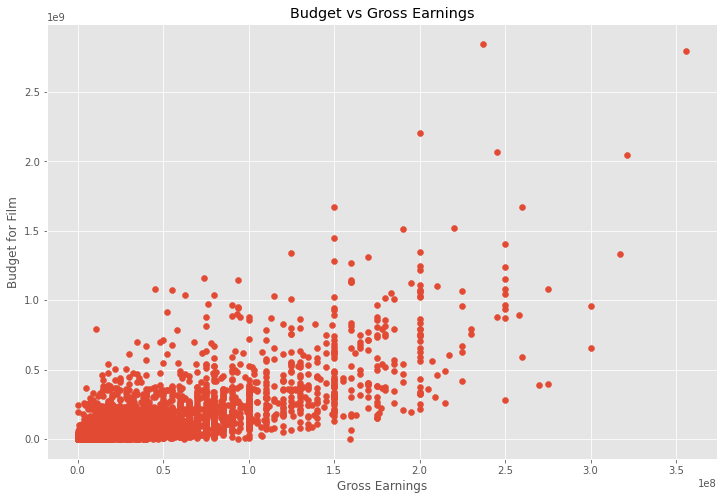

In [15]:
# Scatter plot to compare between bidget and gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

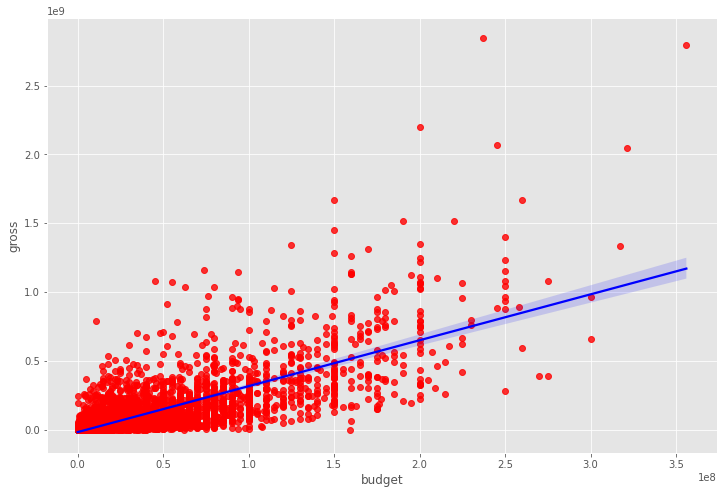

In [16]:
#Plot budget vs gross using seaborn to visualize correlation

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [17]:
#Looking at correlation
df.corr('pearson') #pearson, kendall, spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

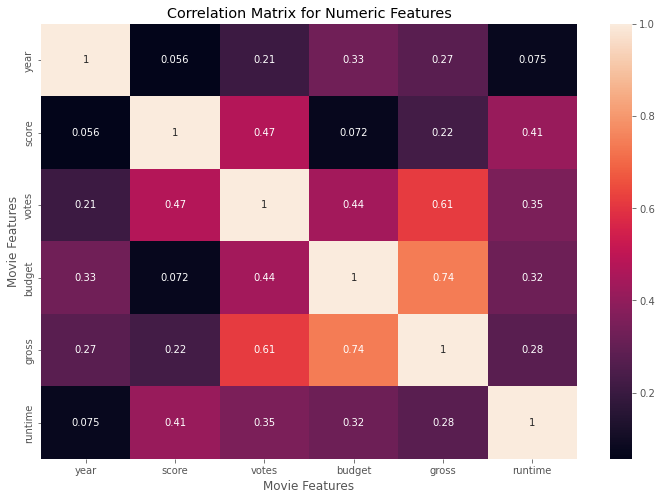

In [18]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [19]:
#Look at company

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
    
df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
3731   386       5      0  2009       527    7.8  1100000       785    1263   
5302   388       5      0  2019       137    8.4   903000       105     513   
1795  4909       5      6  1997       534    7.8  1100000       785    1263   
4730  3643       5      0  2015       529    7.8   876000       768    1806   
5158   389       5      0  2018       145    8.4   897000       105     513   
5334  4388       4      2  2019      1126    6.9   222000      1012    1361   
4720  2117       5      0  2015      1303    7.0   593000       335    2523   
4224  3878       5      0  2012      1899    8.0  1300000      1060    1646   
4713  1541       5      0  2015       165    7.1   370000       809     481   
5346  1530       4      2  2019      2053    6.8   148000       277    1383   
4711   387       5      0  2015      1712    7.3   777000      1060    1646   
5161   567       5      0  2018       723    7.3   661000      1716    2687   
4066  1731       5      1  2011      1092    8.1   790000       452    2862   
5055  3644       5      0  2017       500    7.0   581000      1589    2487   
5185  2118       5      0  2018      1384    6.2   277000       764     777   
4404  1529       4      2  2013      2082    7.4   585000       277    1383   
5052   477       4      7  2017      1561    7.1   283000       155    2822   
5195  1966       4      2  2018      1325    7.6   263000       193     327   
5035  4119       5      0  2017        45    6.6   214000       567    1013   
4387  2014       5      0  2013      1881    7.1   779000      1767     837   
4753  2545       4      2  2015      1050    6.4   218000      1144     362   
4869   750       5      0  2016      1910    7.8   694000       105     513   
5164   343       5      0  2018       565    6.9   404000       809     699   
2753  4407       5      0  2003       516    8.9  1700000      1520    1238   
5314  3595       5      0  2019      1136    7.5   359000      1019     479   
5312   755       5      0  2019      1697    6.8   478000        96     182   
4098  4950       5      0  2011      1442    6.2   390000      1302     886   
4240  3498       5      0  2012      2148    7.7   642000      1732    2221   
4597  4949       5      0  2014      1424    5.6   302000      1302     886   
1387  4388       1      2  1994      1394    8.5   970000      1685    1206   
4228  4048       5      0  2012      1144    8.4  1600000       317    1606   
5319  3640       5      0  2019       553    6.5   394000       768     489   
5306  2091       6      5  2019      2321    8.4  1000000      1937    2998   
5340  4936       1      2  2019      1372    7.7   217000      1052    1525   
3940  4935       1      2  2010      1345    8.2   776000      1162    1525   
3247  2985       5      0  2006      1255    7.3   668000       674    2927   
4890  3260       5      0  2016       509    7.8   572000       615     492   
5335   206       4      1  2019      1837    6.9   239000       705    1468   
4080  2988       5      0  2011      1803    6.6   492000      1635    2927   
5109  1102       4      2  2017      1464    6.3   119000      1144     524   
1244  2115       5      0  1993      1292    8.1   894000      1859    2070   
4924  1411       4      2  2016      1339    7.3   250000        81     153   
2097  3637       4      0  1999      1778    6.5   748000       653    1046   
3923   215       4      1  2010      1679    6.4   392000      1918    1849   
4885  5329       4      2  2016      1673    8.0   450000       239     390   
4226  4240       5      1  2012       492    7.8   773000      1520     967   
2414  1736       4      1  2001      1987    7.6   685000       280    1236   
3558  4047       5      0  2008      1116    9.0  2400000       317    1606   
4451  1101       4      2  2013      1218    7.3   377000      1556     524   
4921  4322       4      1  2016        53    7.4   26400

In [37]:
df.head()

name rating   genre  year  \
3731                                      Avatar  PG-13  Action  2009   
5302                           Avengers: Endgame  PG-13  Action  2019   
1795                                     Titanic  PG-13   Drama  1997   
4730  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
5158                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
3731  December 18, 2009 (United States)    7.8  1100000  James Cameron   
5302     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
1795  December 19, 1997 (United States)    7.8  1100000  James Cameron   
4730  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
5158     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
3731       James Cameron    Sam Worthington  United States  237000000   
5302  Christopher Markus  Robert Downey Jr.  United States  356000000   
1795       James Cameron  Leonardo DiCaprio  United States  200000000   
4730     Lawrence Kasdan       Daisy Ridley  United States  245000000   
5158  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  
3731  2847246203  Twentieth Century Fox    162.0  
5302  2797501328         Marvel Studios    181.0  
1795  2201647264  Twentieth Century Fox    194.0  
4730  2069521700              Lucasfilm    138.0  
5158  2048359754         Marvel Studios    149.0

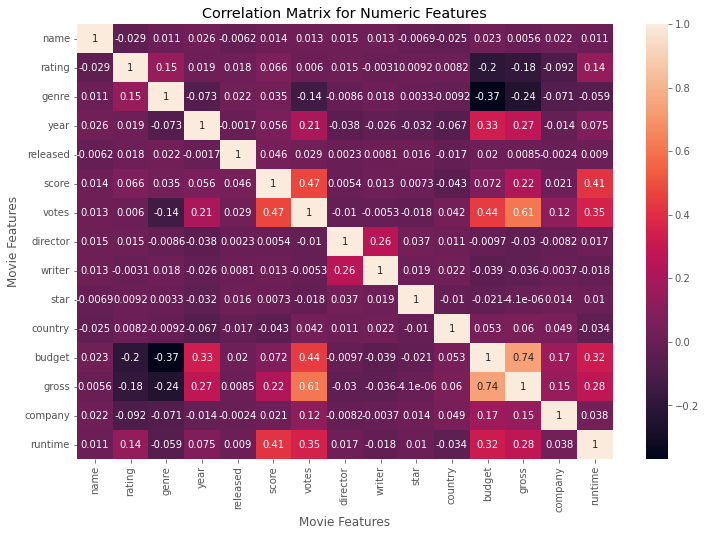

In [32]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [33]:
correaltion_mat = df_numerized.corr()
corr_pairs = correaltion_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [34]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
          gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
company   rating     -0.092357
rating    company    -0.092357
genre     year       -0.073167
year      genre      -0.073167
genre     company    -0.071334
company   genre      -0.071334
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
country   runtime    -0.034477
runtime   country    -0.034477
star      year       -0.032157
year      star       -0.032157
director

In [35]:
high_cor = sorted_pairs[(sorted_pairs) > 0.5]
high_cor

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64